In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# basic setup and read the data
cmap = cm.get_cmap('Pastel1')
PROJECT_DIR = Path().resolve()
data = pd.read_pickle(PROJECT_DIR / "processed_data/bonds-analyzed.pkl")

## Table of Contents
1. [Distribution of Bonds by Issuer and Country](#dist1)
2. [Distribution of Yields and Prices](#dist2)
3. [Yields and Prices by Bond Types](#dist3)
4. [Buy-Sell Spreads and Liquidity](#dist4)

### 1. Distribution of Bonds by Issuer and Country <a class="anchor" id="dist1"></a>

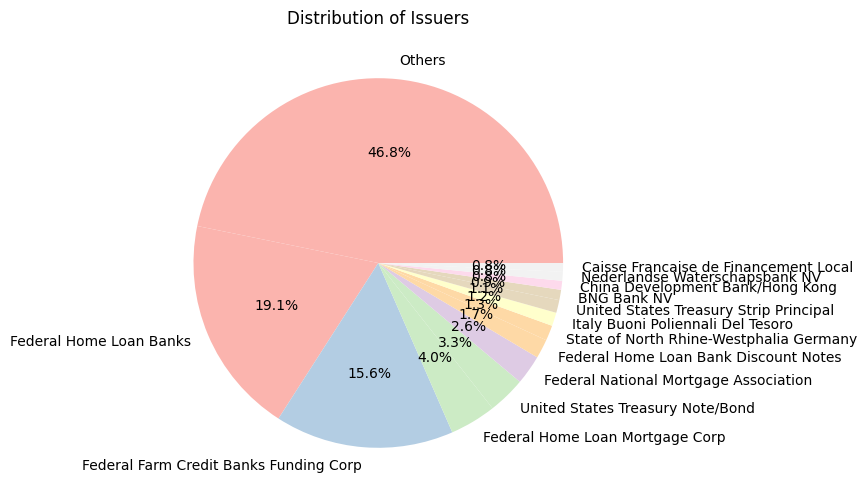

In [55]:
# Define the threshold
threshold_issuer = 0.0075  # 1%

# Calculate the percentage of each category in "Issuer Name"
issuer_counts = data['Issuer'].value_counts(normalize=True)

# Find the categories that are less than the threshold and replace their values with "Others"
mask_issuer = data['Issuer'].isin(issuer_counts[issuer_counts >= threshold_issuer].index)
data['Issuer'] = data['Issuer'].where(mask_issuer, 'Others')

# Create a pie chart for the "Issuer Name" column
issuer_counts = data['Issuer'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(issuer_counts, labels=issuer_counts.index, autopct='%1.1f%%', colors=cmap(np.linspace(0, 1, len(issuer_counts))))
plt.title('Distribution of Issuers')
plt.show()

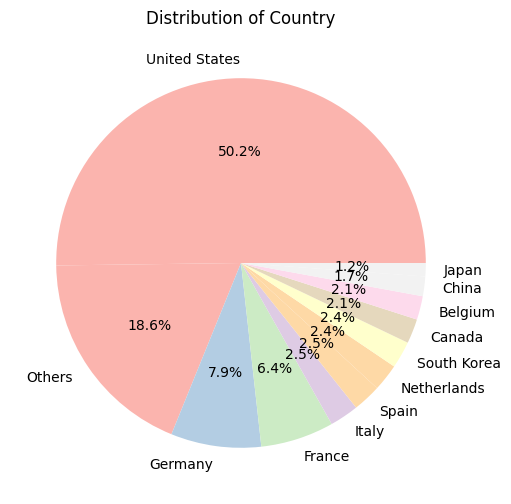

In [56]:
threshold_country = 0.01  # 1.5%

# Calculate the percentage of each category in "Country"
country_counts = data['Country'].value_counts(normalize=True)

# Find the categories that are less than the threshold and replace their values with "Others"
mask_country = data['Country'].isin(country_counts[country_counts >= threshold_country].index)
data['Country'] = data['Country'].where(mask_country, 'Others')

# Create a pie chart for the "Country" column
country_counts = data['Country'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', colors=cmap(np.linspace(0, 1, len(country_counts))))
plt.title('Distribution of Country')
plt.show()

### 2. Distribution of Yields, Maturity, and Prices <a class="anchor" id="dist2"></a>

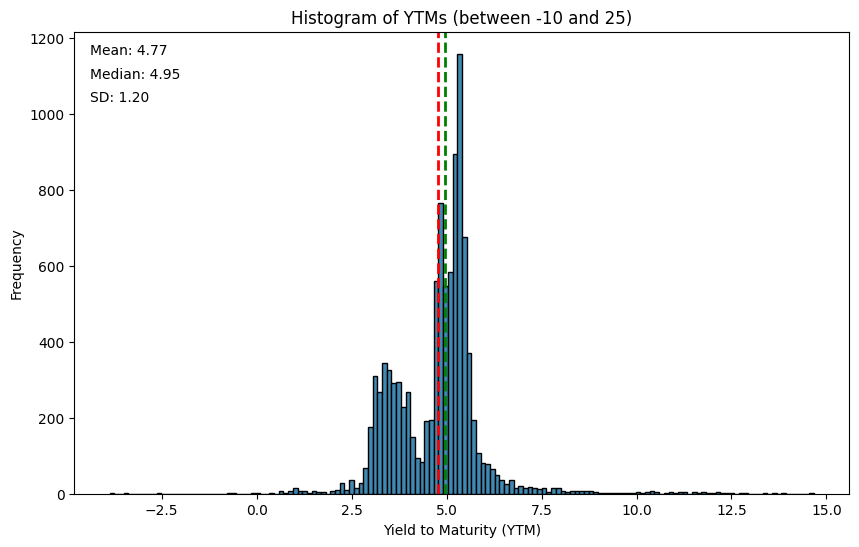

In [57]:
# Convert the column to numeric (errors='coerce' will turn invalid values into NaN)
data['YTM - Ask'] = pd.to_numeric(data['YTM - Ask'], errors='coerce')

# Filter the data
filtered_data = data[(data['YTM - Ask'] >= -5) & (data['YTM - Ask'] <= 15)]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['YTM - Ask'], bins=150, color='#4189B3', edgecolor='black')

# Calculate the mean, median and standard deviation of the filtered data
mean_value = filtered_data['YTM - Ask'].mean()
median_value = filtered_data['YTM - Ask'].median()
std_dev = filtered_data['YTM - Ask'].std()

# Add a vertical line for the mean and median
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2)
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2)

# Add text for the mean, median and standard deviation
plt.text(0.02, 0.95, f'Mean: {mean_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.90, f'Median: {median_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.85, f'SD: {std_dev:.2f}', transform=plt.gca().transAxes)

# Add labels and title
plt.xlabel('Yield to Maturity (YTM)')
plt.ylabel('Frequency')
plt.title('Histogram of YTMs (between -10 and 25)')

# Show the plot
plt.show()

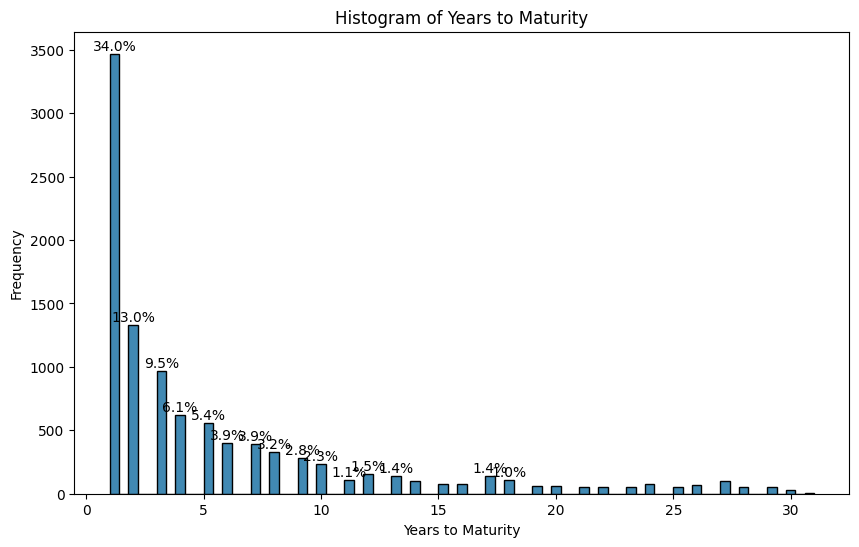

In [58]:
hist, bins = np.histogram(data['Years to Maturity'], bins=75)

width = 1.0 * (bins[1] - bins[0])

# Calculate the center of each bin and total number of observations
center = (bins[:-1] + bins[1:]) / 2
total = len(data['Years to Maturity'])

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(center, hist, align='center', width=width, color='#4189B3', edgecolor='black')

# Add the percentage text on top of each bar
for bar in bars:
    height = bar.get_height()
    # Only display the percentage if the height of the bar is above a certain value
    if height/total > 0.01:  # Adjust this value as needed
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{(height / total) * 100:.1f}%', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Years to Maturity')
plt.ylabel('Frequency')
plt.title('Histogram of Years to Maturity')

# Show the plot
plt.show()

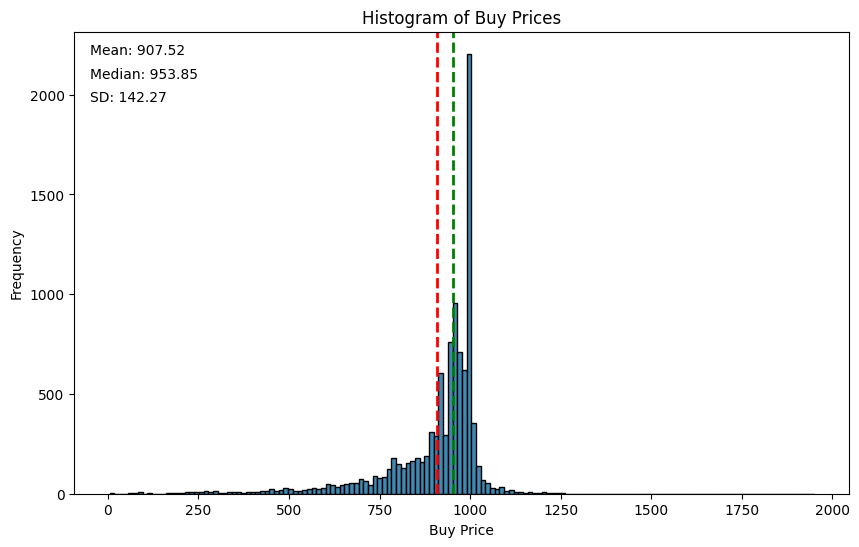

In [59]:
# Calculate the mean, median and standard deviation of the data
mean_value = data['Buy Price'].mean()
median_value = data['Buy Price'].median()
std_dev = data['Buy Price'].std()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Buy Price'], bins=150, color='#4189B3', edgecolor='black')

# Add a vertical line for the mean and median
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2)
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2)

# Add text for the mean, median and standard deviation
plt.text(0.02, 0.95, f'Mean: {mean_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.90, f'Median: {median_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.85, f'SD: {std_dev:.2f}', transform=plt.gca().transAxes)

# Add labels and title
plt.xlabel('Buy Price')
plt.ylabel('Frequency')
plt.title('Histogram of Buy Prices')

# Show the plot
plt.show()

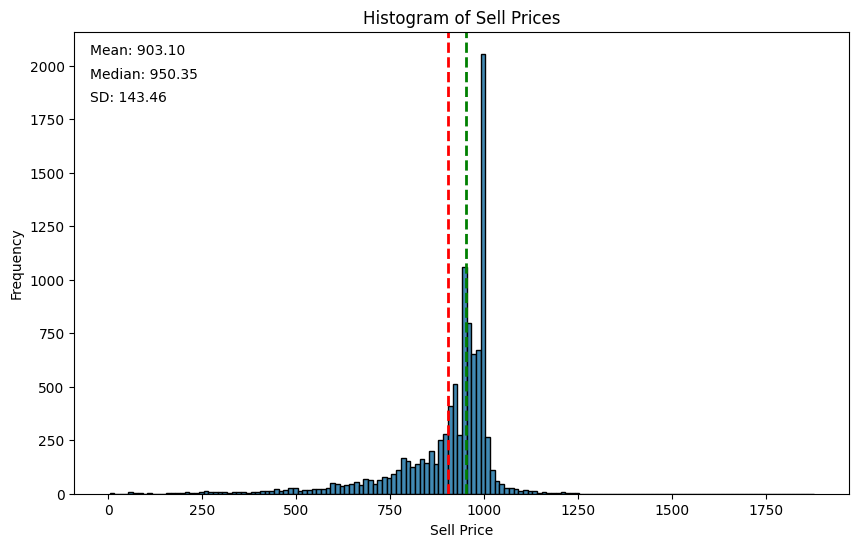

In [60]:
# Calculate the mean, median and standard deviation of the data
mean_value = data['Sell Price'].mean()
median_value = data['Sell Price'].median()
std_dev = data['Sell Price'].std()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Sell Price'], bins=150, color='#4189B3', edgecolor='black')

# Add a vertical line for the mean and median
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2)
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2)

# Add text for the mean, median and standard deviation
plt.text(0.02, 0.95, f'Mean: {mean_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.90, f'Median: {median_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.85, f'SD: {std_dev:.2f}', transform=plt.gca().transAxes)

# Add labels and title
plt.xlabel('Sell Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sell Prices')

# Show the plot
plt.show()

### 3. Yields and Prices by Bond Types <a class="dist3" id="mixed"></a>

In [61]:
# Subset the data where "Country" is "US"
us_data = data[data["Country"] == "United States"]

# Separate each "Mty Type" into a different DataFrame
at_maturity_df = us_data[us_data["Mty Type"] == "AT MATURITY"]
callable_df    = us_data[us_data["Mty Type"] == "CALLABLE"]
normal_df      = us_data[us_data["Mty Type"] == "NORMAL"]
sinkable_df    = us_data[us_data["Mty Type"] == "SINKABLE"]
putable_df     = us_data[us_data["Mty Type"] == "PUTABLE"]
call_sink_df   = us_data[us_data["Mty Type"] == "CALL/SINK"]

print(f"""
AT MATURITY:
Average YTM (Ask):        {at_maturity_df['YTM - Ask'].mean()}
Average YTM (Bid):        {at_maturity_df['YTM - Bid'].mean()}
Average Buy Price:        {at_maturity_df['Buy Price'].mean()}
Average Sell Price:       {at_maturity_df['Sell Price'].mean()}
Average Coupon Rate:      {at_maturity_df['Cpn'].mean()}
Distribution of credit ratings:
{at_maturity_df["BBG Composite"].value_counts()}

CALLABLE:
Average YTM (Ask):        {callable_df['YTM - Ask'].mean()}
Average YTM (Bid):        {callable_df['YTM - Bid'].mean()}
Average Buy Price:        {callable_df['Buy Price'].mean()}
Average Sell Price:       {callable_df['Sell Price'].mean()}
Average Coupon Rate:      {callable_df['Cpn'].mean()}
Distribution of credit ratings:
{callable_df["BBG Composite"].value_counts()}

NORMAL:
Average YTM (Ask):        {normal_df['YTM - Ask'].mean()}
Average YTM (Bid):        {normal_df['YTM - Bid'].mean()}
Average Buy Price:        {normal_df['Buy Price'].mean()}
Average Sell Price:       {normal_df['Sell Price'].mean()}
Average Coupon Rate:      {normal_df['Cpn'].mean()}
Distribution of credit ratings:
{normal_df["BBG Composite"].value_counts()}

SINKABLE:
Average YTM (Ask):        {sinkable_df['YTM - Ask'].mean()}
Average YTM (Bid):        {sinkable_df['YTM - Bid'].mean()}
Average Buy Price:        {sinkable_df['Buy Price'].mean()}
Average Sell Price:       {sinkable_df['Sell Price'].mean()}
Average Coupon Rate:      {sinkable_df['Cpn'].mean()}
Distribution of credit ratings:
{sinkable_df["BBG Composite"].value_counts()}

PUTABLE:
Average YTM (Ask):        {putable_df['YTM - Ask'].mean()}
Average YTM (Bid):        {putable_df['YTM - Bid'].mean()}
Average Buy Price:        {putable_df['Buy Price'].mean()}
Average Sell Price:       {putable_df['Sell Price'].mean()}
Average Coupon Rate:      {putable_df['Cpn'].mean()}
Distribution of credit ratings:
{putable_df["BBG Composite"].value_counts()}
""")


AT MATURITY:
Average YTM (Ask):        5.199067420813349
Average YTM (Bid):        5.442697349683994
Average Buy Price:        973.3062884811417
Average Sell Price:       969.8099510703364
Average Coupon Rate:      3.6966564796131207
Distribution of credit ratings:
BBG Composite
AA+    1325
Name: count, dtype: int64

CALLABLE:
Average YTM (Ask):        5.116181978737823
Average YTM (Bid):        5.402749482229806
Average Buy Price:        921.2170798919336
Average Sell Price:       916.6489085295253
Average Coupon Rate:      2.5796792744114256
Distribution of credit ratings:
BBG Composite
AA+    2462
Name: count, dtype: int64

NORMAL:
Average YTM (Ask):        4.611573523383395
Average YTM (Bid):        4.673437220567939
Average Buy Price:        841.8440658362989
Average Sell Price:       840.5153540925266
Average Coupon Rate:      1.7679777212953738
Distribution of credit ratings:
Series([], Name: count, dtype: int64)

SINKABLE:
Average YTM (Ask):        4.191861206916149
Average YT

### Buy-Sell Spreads and Liquidity <a class="dist4" id="mixed"></a>

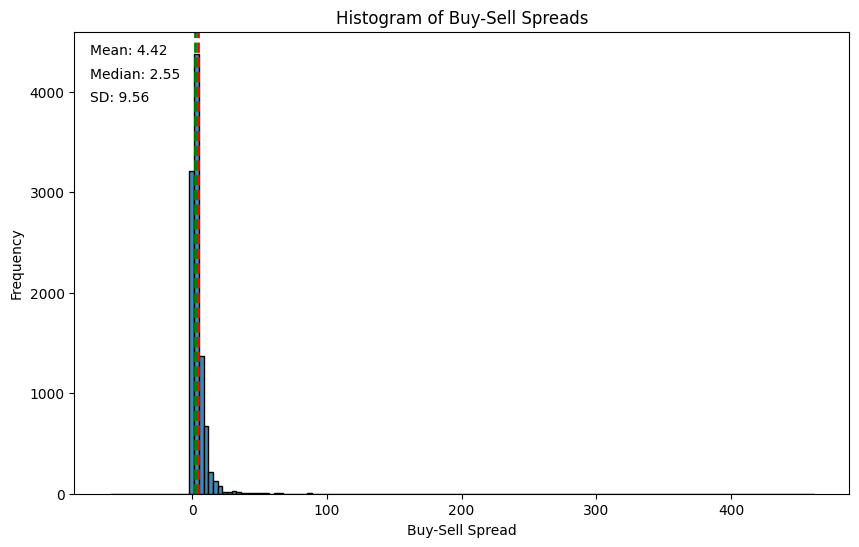

In [62]:
# Calculate the mean, median and standard deviation of the data
mean_value = data['Buy-Sell Spread'].mean()
median_value = data['Buy-Sell Spread'].median()
std_dev = data['Buy-Sell Spread'].std()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Buy-Sell Spread'], bins=150, color='#4189B3', edgecolor='black')

# Add a vertical line for the mean and median
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2)
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2)

# Add text for the mean, median and standard deviation
plt.text(0.02, 0.95, f'Mean: {mean_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.90, f'Median: {median_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.85, f'SD: {std_dev:.2f}', transform=plt.gca().transAxes)

# Add labels and title
plt.xlabel('Buy-Sell Spread')
plt.ylabel('Frequency')
plt.title('Histogram of Buy-Sell Spreads')

# Show the plot
plt.show()

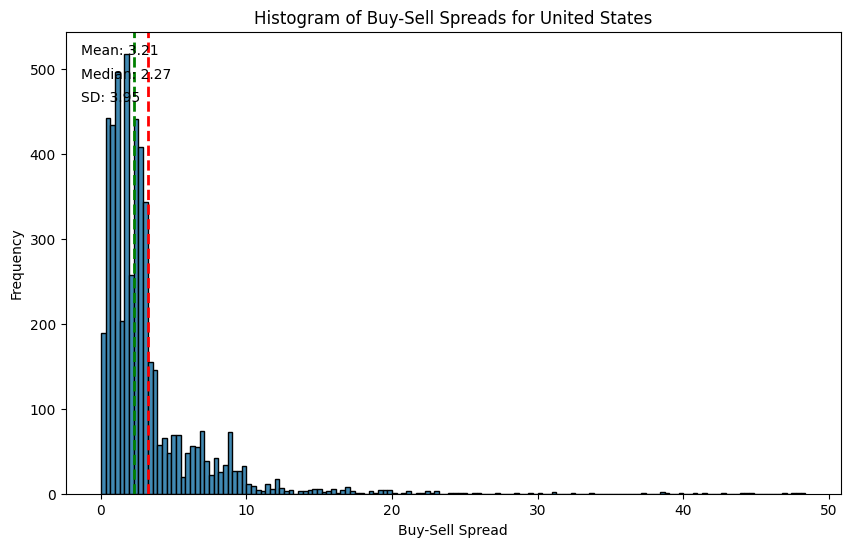

In [63]:
# Filter the data for "Buy-Sell Spread" between -20 and +50 and "Country" is "United States"
filtered_data = data[(data['Buy-Sell Spread'].between(-20, 50)) & (data['Country'] == 'United States')]

# Calculate the mean, median and standard deviation of the filtered data
mean_value = filtered_data['Buy-Sell Spread'].mean()
median_value = filtered_data['Buy-Sell Spread'].median()
std_dev = filtered_data['Buy-Sell Spread'].std()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Buy-Sell Spread'], bins=150, color='#4189B3', edgecolor='black')

# Add a vertical line for the mean and median
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2)
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2)

# Add text for the mean, median and standard deviation
plt.text(0.02, 0.95, f'Mean: {mean_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.90, f'Median: {median_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.85, f'SD: {std_dev:.2f}', transform=plt.gca().transAxes)

# Add labels and title
plt.xlabel('Buy-Sell Spread')
plt.ylabel('Frequency')
plt.title('Histogram of Buy-Sell Spreads for United States')

# Show the plot
plt.show()

### Duration

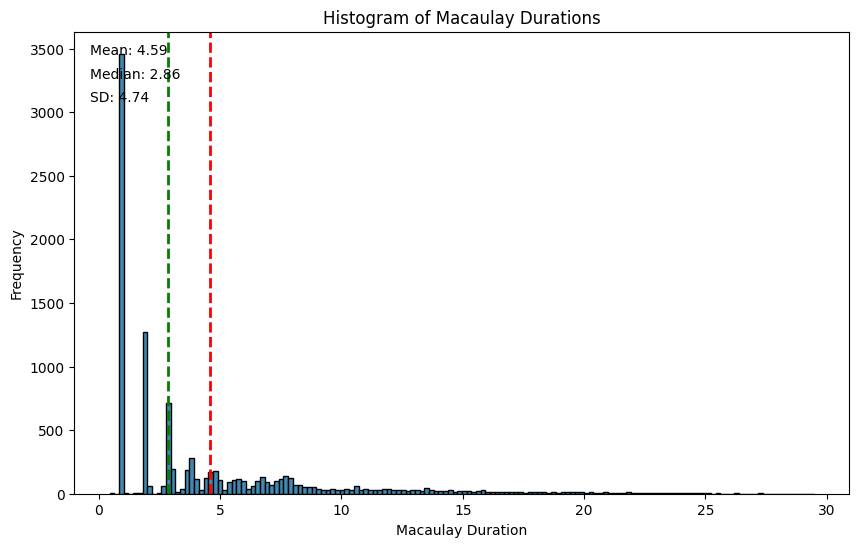

In [64]:
# Calculate the mean, median and standard deviation of the data
mean_value = data['Macaulay Duration (Buy)'].mean()
median_value = data['Macaulay Duration (Buy)'].median()
std_dev = data['Macaulay Duration (Buy)'].std()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Macaulay Duration (Buy)'], bins=150, color='#4189B3', edgecolor='black')

# Add a vertical line for the mean and median
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2)
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2)

# Add text for the mean, median and standard deviation
plt.text(0.02, 0.95, f'Mean: {mean_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.90, f'Median: {median_value:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.85, f'SD: {std_dev:.2f}', transform=plt.gca().transAxes)

# Add labels and title
plt.xlabel('Macaulay Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Macaulay Durations')

# Show the plot
plt.show()